# Mini-projets ON2 : Radioactivité : désintégration Bêta

## Description du projet

Une population d’isotopes radioactifs se désintègre spontanément et aléatoirement par désintégration . Un échantillon d’iode 131 contient N0 = 109 isotopes caractérisés par une demi-vie  = 0.0864 j-1 . On considérera que l’échantillon est isolé et que par conséquent celui-ci n’échange pas de particules avec l’extérieur.

On note N la population d’atomes radioactifs encore présents dans l’échantillon à un instant t. 

* Montrer que l’équation différentielle du nombre d’isotopes N dans l’échantillon en fonction du temps, s’écrit : dN = -Lambda x N x dt.

Question 2 à resoudre
N(t)=N0​e−λt

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def N(t, lbda, n0):
    """Loi de desintégration en solution analytique.
    t exprimé en jour.
    """
    
    # Rappel np.exp retourne un vecteur si t est un vecteur
    return n0 * np.exp(-lbda*t)

In [3]:
def draw_graph(series):
    """Trace le diagramme des series passées. Ces séries sont de la forme
    (temps_jours, N(t), style, label)
    """
    plt.figure()
    for t, n, style, label in series:
        plt.plot(t, n, style, label=label)
    plt.legend()
    plt.grid()
    plt.xlabel("Nb jours")
    plt.ylabel("Population d'isotopes")
    plt.yscale("log")
    plt.title("Loi de désintégration")
    plt.show()
    

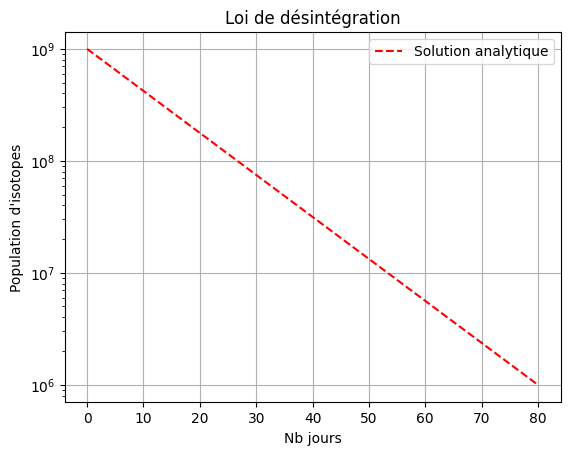

In [32]:
nb_max_jours = 80
lbda = 0.0864  #en j-1
n0 = 10**9

t = np.arange(0, nb_max_jours+1, 1)
n_analytique = N(t, lbda, n0)

draw_graph([
    (t, n_analytique, 'r--', "Solution analytique")
])


Différence à l'issue des 80 jours: 37.29959903590828 %


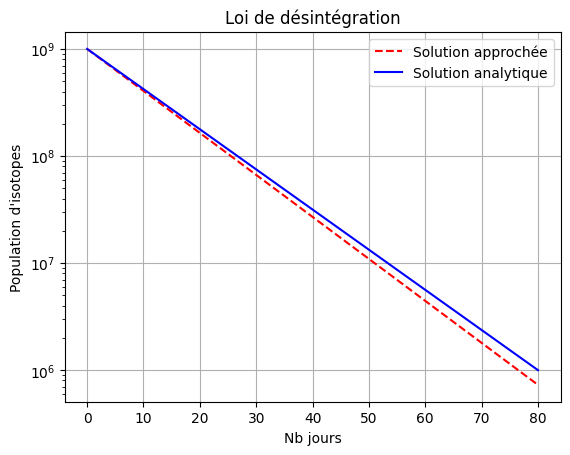

In [33]:
def euler_explicite(t1, y1, t2, f, lbda):
    """Cette fonction calcule pour un pas de temps la 
    solution de l'équation différentielle, avec :
    t1 = point t0 où on a déjà calculé la solution
    y1 = solution de l'équation différentielle au temps t0
    t2 = point où l'on veut calculer la solution
    f = fonction telle que dy/dt = f(t, y(t))"""   
    return y1 + (t2 - t1)*f(y1, lbda)

def f(y, lbda):
    return - lbda*y # fonction f telle que dy/dt = f

def n_euler(t, y0):
    y_sol=[y0]
    for i in range (len(t)-1) : #boucle pour trouver la solution
        # pour tous les temps de t0 jusqu'à tn
        t0 = t[i] # t_i
        t1 = t[i + 1] # t_{i+1}
        y0 = y_sol[i] # y_i
        y1 = euler_explicite(t0, y0, t1, f, lbda) # calcul de la solution au temps t1=t_{i+1}
        y_sol.append(y1) #ajout de la solution dans la liste des solutions
    return y_sol
  
t0 = 0 # temps initial
y0 = n0 # condition initiale : y(t0) = y0 

# l'équation différentielle
y_euler = n_euler(t, y0)

print("Différence à l'issue des 80 jours:",
      (n_analytique[-1]-y_euler[-1])/y_euler[-1]*100, "%")

draw_graph([
    (t, y_euler, 'r--', "Solution approchée"),
    (t, n_analytique, 'b-', "Solution analytique")
])

In [ ]:
def percent(y1, y2):
    return (y2-y1)/y2*100

def serie_plusieurs_jours(nb_jours, delta_secondes):
    return np.linspace(0, nb_jours, int(nb_jours*24*60*60/delta_secondes))

def recherche_ecart(delta):
    # Calcul sur 80j pour deltaT= delta secondes
    serie_t = serie_plusieurs_jours(80., delta)
    print(serie_t)
    nd = n_euler(serie_t, y0)
    perc = percent(nd[-1], n_analytique[-1])
    print(f"Différence pour 80j et delta={delta}s : {perc}%" )
    return serie_t, nd, perc

t05, n05, perc05 = recherche_ecart(0.5)
t5, n5, perc5 = recherche_ecart(5)


# On voit que les courbes sont très proches car incertitudes très faibles 
draw_graph([
    (t05, n05, 'r--', "Solution approchée delta 0.5s"),
    (t5, n5, 'y-', "Solution approchée delta 5s"),
    (t, n_analytique, 'b-', "Solution analytique")
])



TypeError: 'float' object cannot be interpreted as an integer

On voir que pour delta 0.5s ou 5s, on a une très faible incertitude, avec un rapport de 10 quand on passe de l'un à l'autre. 
On peut donc supposer que pour 500s, on s'approche de 0.17%, ce qu'on va vérfier.

In [7]:
x = 500  # secondes
tx, nx, perc500 = recherche_ecart(x)


Différence pour 80j et delta=500s : 0.17272079650484257%


Si on teste une valeur proche de 300s, on voit qu'on passe en dessous de 0.1%.

In [8]:
x = 200  # secondes
tx, nx, perc200 = recherche_ecart(x)


Différence pour 80j et delta=200s : 0.06910732785257012%


Pour avoir la valeur pour laquelle la valeur passe en dessous de 0.1%, on peut
appliquer une recherche par dichotomie, avec comme test de réussite une
incertitude entre 0.1% et 0.099%  

In [9]:
delta_min = 200
delta_max = 500
perc = perc200

while not(perc >=0.099 and perc <=0.1):
    delta = int(delta_min + (delta_max-delta_min)/2)
    tx, nx, perc = recherche_ecart(delta)
    if perc >= 0.1:
        delta_max = delta
    elif perc <= 0.099:
        delta_min = delta

# Sortie de boucle, on a un delta passant en dessous de 0.1%
print(f"Delta pour écart inférieur à 0.1% : {delta}")        

 

Différence pour 80j et delta=350s : 0.12092468877327649%
Différence pour 80j et delta=275s : 0.09501810303208282%
Différence pour 80j et delta=312s : 0.107800476889466%
Différence pour 80j et delta=293s : 0.10123550595961155%
Différence pour 80j et delta=284s : 0.09812496119121755%
Différence pour 80j et delta=288s : 0.09950652278493037%
Delta pour écart inférieur à 0.1% : 288


On voir que ça se joue entre 293s et 288s. Pour avoir la première valeur entière en dessous de 0.1%, on peut partir de 293s et descendre pas à pas. 

In [10]:
delta = 293
tx, nx, perc = recherche_ecart(delta)
while perc >= 0.1:
    delta = delta -1
    tx, nx, perc = recherche_ecart(delta)

print(f"Première valeur avec écart en dessous de 0.1%: {delta}s ({perc}%)")

Différence pour 80j et delta=293s : 0.10123550595961155%
Différence pour 80j et delta=292s : 0.10088918006057747%
Différence pour 80j et delta=291s : 0.10054521563701484%
Différence pour 80j et delta=290s : 0.10019938551195809%
Différence pour 80j et delta=289s : 0.0998559262307871%
Première valeur avec écart en dessous de 0.1%: 289s (0.0998559262307871%)


## Désintégration père-fils

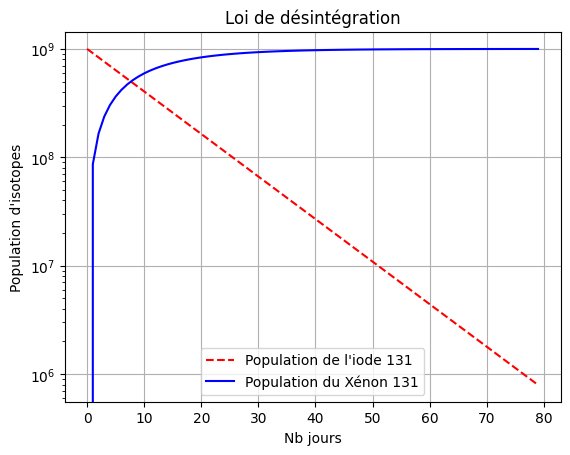

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
[1.00000000e+09 9.13600000e+08 8.34664960e+08 7.62549907e+08
 6.96665595e+08 6.36473688e+08 5.81482361e+08 5.31242285e+08
 4.85342952e+08 4.43409321e+08 4.05098756e+08 3.70098223e+08
 3.38121737e+08 3.08908019e+08 2.82218366e+08 2.57834699e+08
 2.35557781e+08 2.15205589e+08 1.96611826e+08 1.79624564e+08
 1.64105002e+08 1.49926330e+08 1.36972695e+08 1.25138254e+08
 1.14326309e+08 1.04448516e+08 9.54241639e+07 8.71795162e+07
 7.96472060e+07 7.27656874e+07 6.64787320e+07 6.07349695e+07
 5.54874682e+07 5.06933509e+07 4.63134454e+07 4.23119637e+07
 3.86562100e+07 3.53163135e+07 3.22649840e+07 2.94772894e+07
 2.69304516e+07 2.46036606e+07 2.24779043e+07 2.05358134e+07
 1.87615191e+07 1.71405238e+07 1.56595826e+07 1.43065946e+07
 1.30705049e+07 1.19412

In [ ]:
def simu_chaine(dt, lambda_p, lambda_f, jours=80):
    """On va travailler en analytique, donc pas besoin d'approximation Euler
    et donc on peut prendre les jours comme pas de temps."""
    t_max = jours 
    temps = np.arange(0, t_max, dt)
    
    # Initialisation des tableaux
    N_pere = np.zeros(len(temps))
    N_fils = np.zeros(len(temps))
    
    # Conditions initiales (100% de père au début)
    N_pere[0] = n0
    N_fils[0] = 0
    
    for i in range(len(temps)-1):
        # Variation du père
        dN_p = -lambda_p * N_pere[i] * dt
        N_pere[i+1] = N_pere[i] + dN_p
        
        # Variation du fils (gain du père - perte propre)
        dN_f = (lambda_p * N_pere[i] - lambda_f * N_fils[i]) * dt
        N_fils[i+1] = N_fils[i] + dN_f
      
    return temps, N_pere, N_fils

# Test avec Xe-131 stable (lambda_fils = 0)
dt = 1  # pas de temps de 1 jour
t, pere, fils = simu_chaine(dt, lbda, 0)

draw_graph([
    (t, pere, 'r--', "Population de l'Iode 131"),
    (t, fils, 'b-', "Population du Xénon 131"),
])

